In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", category = FutureWarning)


sns.set(style="darkgrid")

In [15]:
from google.colab import drive

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = pd.read_csv('/content/drive/MyDrive/Data/collegePlace.csv')

In [19]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [20]:
data.shape

(2966, 8)

In [23]:
#EDA

In [24]:
data.describe().T.style.bar(subset=['mean'], color='#105ff2').background_gradient(subset=['std'], cmap='Greens').background_gradient(subset=['50%'], cmap='cool')

,count,mean,std,min,25%,50%,75%,max
Age,2966.000000,21.485840,1.324933,19.000000,21.000000,21.000000,22.000000,30.000000
Internships,2966.000000,0.703641,0.740197,0.000000,0.000000,1.000000,1.000000,3.000000
CGPA,2966.000000,7.073837,0.967748,5.000000,6.000000,7.000000,8.000000,9.000000
Hostel,2966.000000,0.269049,0.443540,0.000000,0.000000,0.000000,1.000000,1.000000
HistoryOfBacklogs,2966.000000,0.192178,0.394079,0.000000,0.000000,0.000000,0.000000,1.000000
PlacedOrNot,2966.000000,0.552596,0.497310,0.000000,0.000000,1.000000,1.000000,1.000000


In [25]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [26]:
fig = px.histogram(data, 'Age',title="<b>Average Age of Student</b>")

fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="yellow")

fig.show()

In [27]:
fig = px.histogram(data, 'Age', color="Gender", title="<b>Average Age Gender wise</b>")

fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="yellow")

fig.show()

In [28]:
data['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [29]:
fig = px.pie(data, names = "Gender",title = "<b>Counts in Gender</b>", hole = 0.5, )

fig.update_traces(textposition='inside',textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))
fig.show()

In [30]:
male = data[data['Gender'] == "Male"]
female = data[data['Gender'] == "Female"]

In [31]:
total_male_pass = male[male['PlacedOrNot'] == 1].shape[0]
total_female_pass = female[female['PlacedOrNot'] == 1].shape[0]

In [33]:
total_male = male.shape[0]
total_female = female.shape[0]

In [34]:
pass_male_percentage = np.round((total_male_pass * 100) / total_male,2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female,2)

In [35]:
overview = {"Total Male": [total_male],
             "Total Female": [total_female],
             "Total male pass" : [total_male_pass],
             "Total female pass" : [total_female_pass],
             "% of Passed Male" : [pass_male_percentage],
             "% of Passed Female" : [pass_female_percentage]}

In [36]:
overview

{'Total Male': [2475],
 'Total Female': [491],
 'Total male pass': [1364],
 'Total female pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

In [37]:
gender_wise = pd.DataFrame(overview, index=["Detail"])
gender_wise.T

,Detail
Total Male,2475.00
Total Female,491.00
Total male pass,1364.00
Total female pass,275.00
% of Passed Male,55.11
% of Passed Female,56.01


In [38]:
fig = px.histogram(data_frame = data,
             x = "Stream",
             color="PlacedOrNot", title="<b>Counts of Stream</b>",
             pattern_shape_sequence=['.'],
#              template='plotly_dark'
                  )

fig.show()


In [39]:
cgpa_above_avg = data[data['CGPA'] > data['CGPA'].mean()]

cgpa_above_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
11,22,Female,Electrical,1,8,0,1,1
13,21,Male,Computer Science,1,8,0,1,1
...,...,...,...,...,...,...,...,...
2951,21,Male,Computer Science,3,8,0,0,1
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2956,22,Male,Computer Science,0,8,0,0,1


In [40]:
fig = px.histogram(data_frame = cgpa_above_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Above Average CGPA Vs Placement</b>",
                   template='plotly')

fig.update_layout(bargap=0.7)

fig.show()

In [41]:
cgpa_below_avg = data[data['CGPA'] < data['CGPA'].mean()]

cgpa_below_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
...,...,...,...,...,...,...,...,...
2960,23,Male,Mechanical,1,7,1,0,0
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0


In [42]:
fig = px.histogram(data_frame = cgpa_below_avg,x = 'CGPA', color='PlacedOrNot',
                   title = "<b>Below Average CGPA Vs Placement</b>", barmode='group')

fig.update_layout(bargap=0.4)

fig.show()

In [43]:
stream_wise = data.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'sum',                            
                                           "CGPA":'mean',
                                           'PlacedOrNot':'sum'})

stream_wise.style.highlight_max()

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
Civil,21.441640,173,7.094637,146
Computer Science,21.559278,676,7.039948,452
Electrical,21.299401,203,7.080838,181
Electronics And Communication,21.410377,306,7.125000,251
Information Technology,21.539797,509,7.073806,409
Mechanical,21.518868,220,7.063679,200


In [44]:
px.bar(data_frame=stream_wise, barmode='group',
       title = "<b>Stream wise Analyzing</b>",template="plotly")

In [45]:
no_internship = data[data['Internships'] == 0]

no_internship

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1,21,Female,Computer Science,0,7,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
...,...,...,...,...,...,...,...,...
2956,22,Male,Computer Science,0,8,0,0,1
2958,23,Male,Computer Science,0,6,0,1,0
2959,23,Male,Information Technology,0,7,0,0,0
2961,23,Male,Information Technology,0,7,0,0,0


In [46]:
fig = px.histogram(data_frame = no_internship,
                   x = "PlacedOrNot",
                   color="PlacedOrNot",
                   title = "<b>No Internship Experience Vs Placement</b>")

fig.update_layout(bargap=0.7)

fig.show()

In [47]:
#Preprocessing Data

In [48]:
dummy_gender = pd.get_dummies(data['Gender'])
dummy_stream = pd.get_dummies(data['Stream'])


In [49]:
data = pd.concat([data.drop(["Gender", "Stream"], axis = 1), dummy_gender, dummy_stream], axis = 1)
data.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Female,Male,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


In [50]:
data = data[['Age', 'Male', 'Female',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil",
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]

data.head(3)

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,0,0,0,0,0,1,8,1,1,1
1,21,0,1,0,1,0,0,0,0,0,7,1,1,1
2,22,0,1,0,0,1,0,0,0,1,6,0,0,1


In [51]:
#Scaling Featuresb

In [52]:
scaler = StandardScaler()

scaler.fit(data.drop('PlacedOrNot',axis=1))

scaled_features = scaler.transform(data.drop('PlacedOrNot',axis=1))

In [53]:
scaled_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
scaled_features.head()

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,0.445403,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,-0.34593,0.400445,0.957191,1.648269,2.050246
1,-0.366752,-2.245158,2.245158,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,-0.34593,-0.950773,-0.076310,1.648269,2.050246
2,0.388131,-2.245158,2.245158,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,0.400445,-1.109812,-0.606697,-0.487746
3,-0.366752,0.445403,-0.445403,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,-0.950773,0.957191,-0.606697,2.050246
4,0.388131,0.445403,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.35623,-0.34593,-0.950773,0.957191,1.648269,-0.487746


In [54]:
#Visualize Correlation

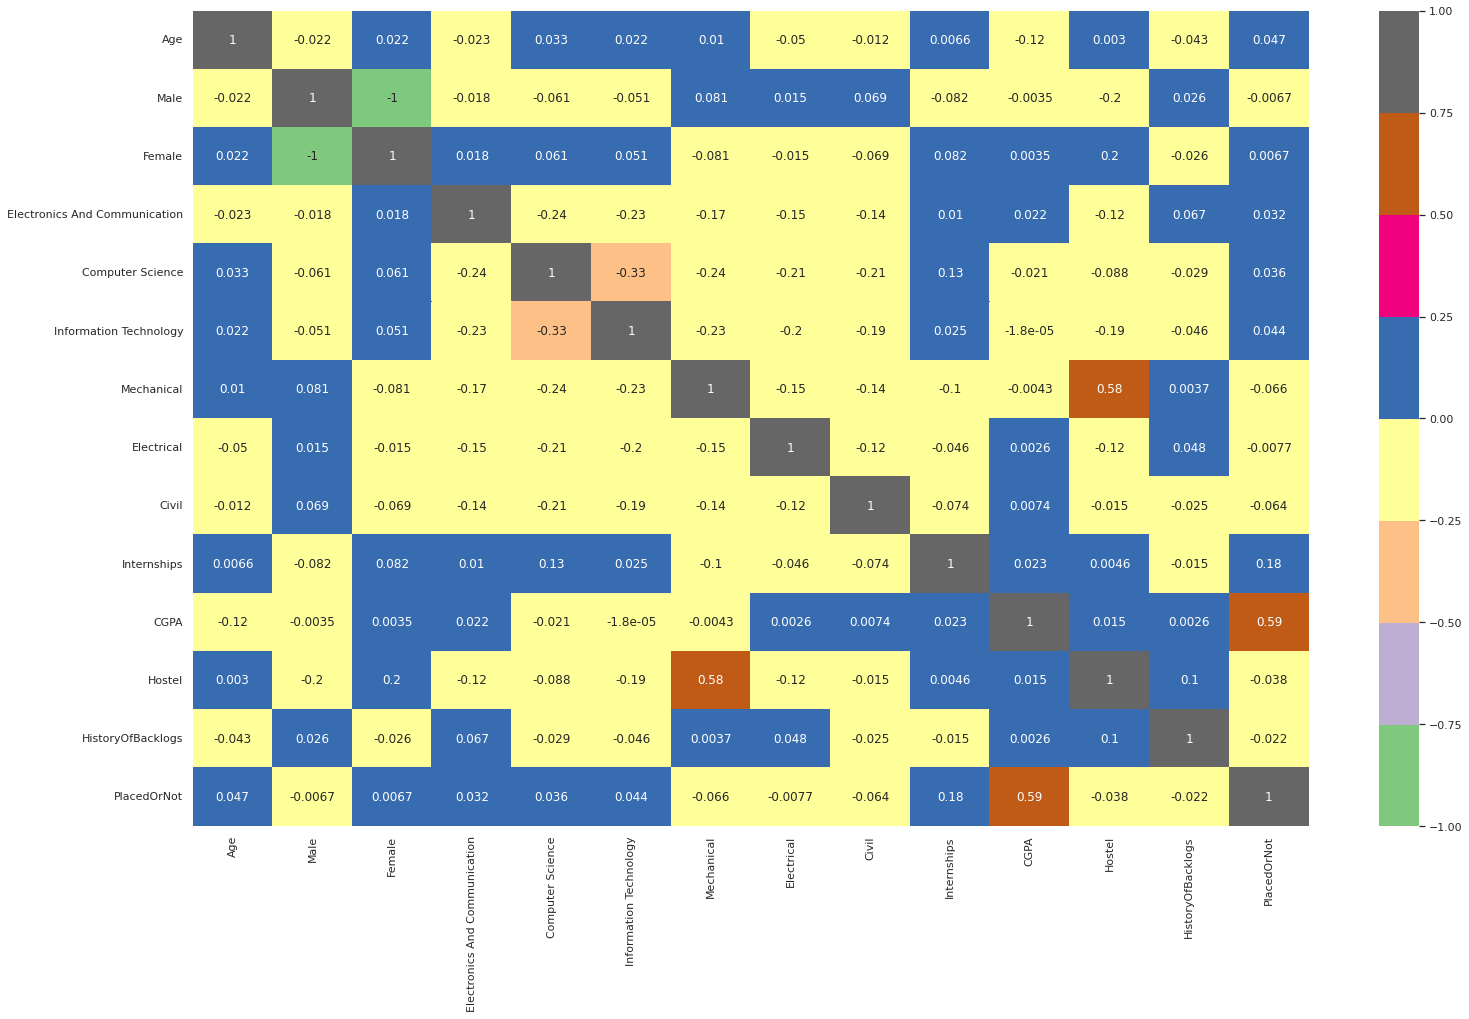

In [55]:
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(25,15))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Accent")

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    data['PlacedOrNot'],
                                                    test_size = 0.25,
                                                    random_state = 0)

In [58]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}\n")

print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_test is: {y_test.shape}")


Shape of X_train is: (2224, 13)
Shape of X_test is: (742, 13)

Shape of y_train is: (2224,)
Shape of y_test is: (742,)


In [59]:
models = {"DecisionTree":DecisionTreeClassifier(),
         "RandomForest":RandomForestClassifier(),
         "XgBoost": XGBClassifier(),
         "KNeighborsClassifier":KNeighborsClassifier()}

In [60]:
def models_score(models, X_train, X_test, y_train, y_test):    

    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')

    return model_scores

In [61]:
model_scores = models_score(models, X_train, X_test, y_train, y_test)

In [62]:
model_scores.style.highlight_max()

,Score
KNeighborsClassifier,0.843666
RandomForest,0.870620
DecisionTree,0.876011
XgBoost,0.888140


In [75]:
fig = px.bar(data_frame = model_scores,
             y= "Score",
             title = "<b>Models Score</b>",
             template = "plotly")

fig.update_layout(bargap=0.5)

fig.show()



In [76]:
# Hyper parameter optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [77]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(f'\nTime taken: {thour} hours {tmin} minutes and {round(tsec, 2)} seconds.')
xgb_classifier = XGBClassifier()

In [78]:
random_search = RandomizedSearchCV(xgb_classifier,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5, verbose=3)

In [79]:
start_time = timer(None) 

random_search.fit(X_train, y_train)

timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Time taken: 0.0 hours 0.0 minutes and 3.08 seconds.


In [80]:
xgb_best_params = random_search.best_estimator_
xgb_best_params

XGBClassifier(colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=12,
              min_child_weight=3)

In [81]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [82]:
classifier = xgb_best_params

In [83]:
classifier.fit(X_train, y_train, eval_metric='logloss')

XGBClassifier(colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=12,
              min_child_weight=3)

In [84]:
pred = classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred)}")

Accuracy: 0.894878706199461


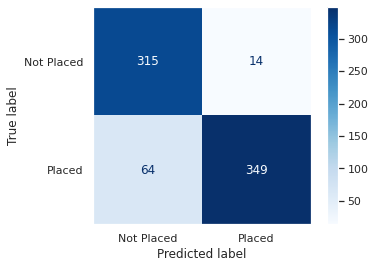

In [85]:
plot_confusion_matrix(classifier,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Not Placed', 'Placed'])
plt.grid(False)
plt.show();